In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import time
from sklearn.metrics import confusion_matrix

# Read the data

In [41]:
# load the dataset
data = pd.read_csv(r'C:\Users\Aditi\Downloads\hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


# I. Exploratory Analysis

In [42]:
data.shape

(119390, 30)

In [43]:
print(data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

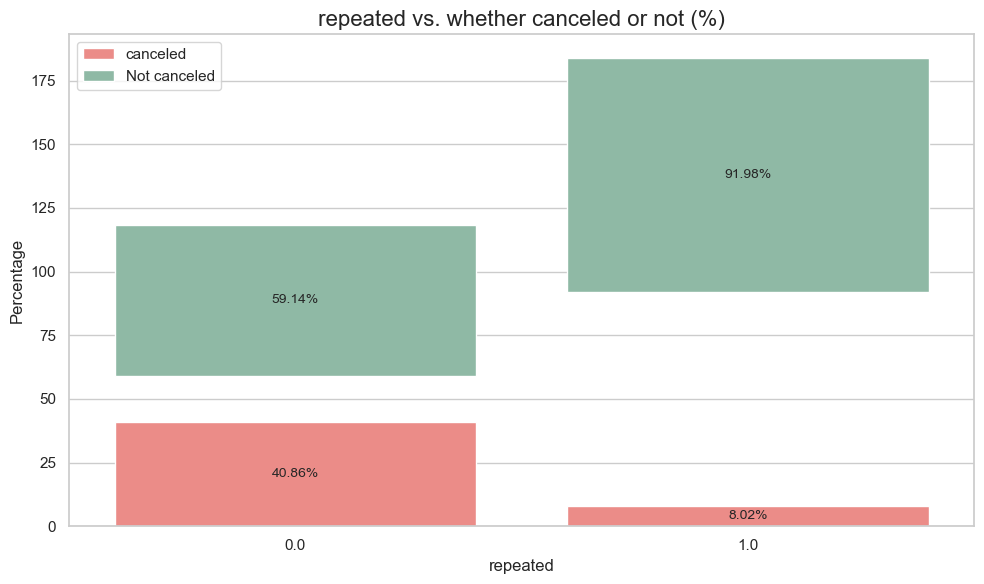

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt


percentage_data = data.groupby('is_repeated_guest')['is_canceled'].value_counts(normalize=True).unstack('is_canceled')
percentage_data['Total'] = percentage_data.sum(axis=1)  # Calculate total percentage
percentage_data['canceled %'] = (percentage_data[1] / percentage_data['Total']) * 100
percentage_data['Not canceled %'] = (percentage_data[0] / percentage_data['Total']) * 100

# Set Seaborn style (optional)
sns.set_style("whitegrid")

# Define custom colors
colors = ['#88c0a5', '#fc7d77']  # Green and red shades

# Create a stacked bar chart with percentages using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=percentage_data.reset_index(), x='is_repeated_guest', y='canceled %', color=colors[1], label='canceled')
sns.barplot(data=percentage_data.reset_index(), x='is_repeated_guest', y='Not canceled %', color=colors[0], label='Not canceled', bottom=percentage_data['Not canceled %'])

# Add percentage annotations to the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentage = f"{height:.2f}%"
    ax.annotate(percentage, (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

# Customize the plot
plt.title('repeated vs. whether canceled or not (%)', fontsize=16)
plt.xlabel('repeated', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)  # Customize x-axis labels

# Show the plot
plt.tight_layout()
plt.legend()
plt.show()

0.0    36509
1.0    23717
Name: is_canceled, dtype: int64




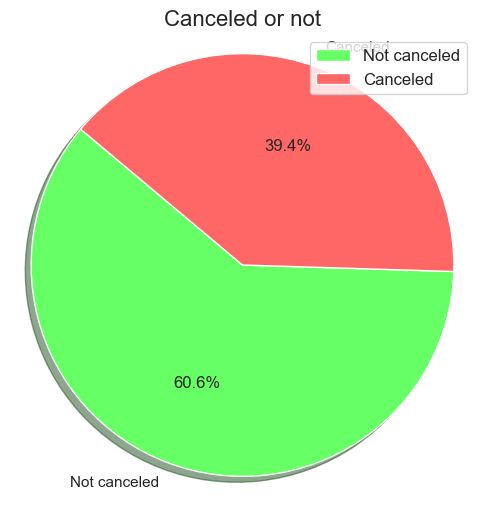

In [83]:
print(data['is_canceled'].value_counts())
print('\n')

# plot
# Data
lab = ['Not canceled', 'Canceled']
count = data['is_canceled'].value_counts()
colors = ['#66FF66', '#FF6666']  # Green and red colors

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(count, labels=lab, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)

# Title and formatting
plt.title('Canceled or not', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(labels=lab, loc='upper right', fontsize=12)

# Display the plot
plt.show()

C:\Users\Aditi\AppData\Local\Temp\ipykernel_17144\3861116484.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='children', y='arrival_date_year', ci=None, color='black')


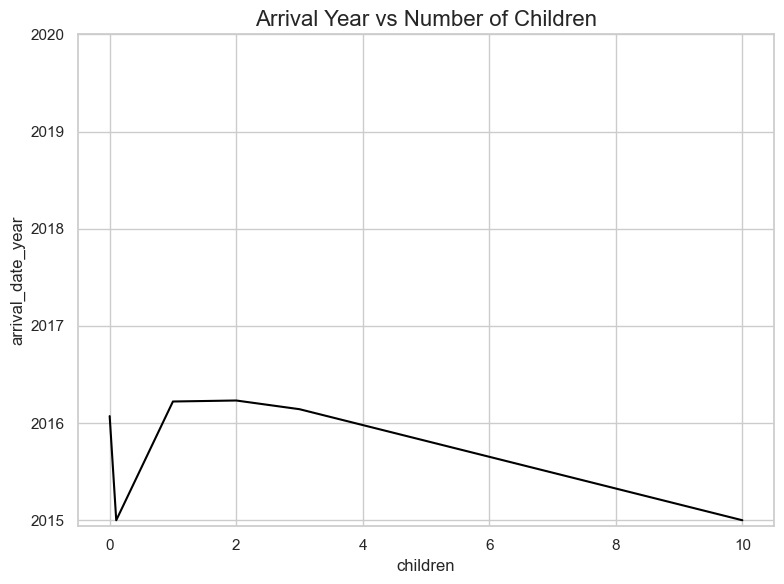

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your custom years
custom_years = [2015, 2016, 2017, 2018, 2019, 2020]

plt.figure(figsize=(8, 6))
sns.lineplot(data=data, x='children', y='arrival_date_year', ci=None, color='black')

# Customize the y-axis ticks
plt.yticks(custom_years)

# Customize the plot
plt.title('Arrival Year vs Number of Children', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


# II. DATA CLEANING

# Checking for null values in each column

In [45]:
round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)

company                           94.31
agent                             13.69
country                            0.41
hotel                              0.00
is_repeated_guest                  0.00
required_car_parking_spaces        0.00
adr                                0.00
customer_type                      0.00
days_in_waiting_list               0.00
deposit_type                       0.00
booking_changes                    0.00
assigned_room_type                 0.00
reserved_room_type                 0.00
previous_bookings_not_canceled     0.00
previous_cancellations             0.00
distribution_channel               0.00
is_canceled                        0.00
market_segment                     0.00
meal                               0.00
babies                             0.00
children                           0.00
adults                             0.00
stays_in_week_nights               0.00
stays_in_weekend_nights            0.00
arrival_date_day_of_month          0.00


# Dropping 'company' as 94.31 percent of this column are null values

In [46]:
data.drop('company', axis=1, inplace=True)

In [47]:
missing_cols = data.columns[data.isnull().any()]
# Impute missing values using the mean for numerical columns
for col in missing_cols:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col].fillna(data[col].mean(), inplace=True)
    # Handle missing values in categorical columns (e.g., creating a new category)
    elif data[col].dtype == 'object':
        data[col].fillna("Unknown", inplace=True)

In [48]:
round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)

hotel                             0.0
distribution_channel              0.0
required_car_parking_spaces       0.0
adr                               0.0
customer_type                     0.0
days_in_waiting_list              0.0
agent                             0.0
deposit_type                      0.0
booking_changes                   0.0
assigned_room_type                0.0
reserved_room_type                0.0
previous_bookings_not_canceled    0.0
previous_cancellations            0.0
is_repeated_guest                 0.0
market_segment                    0.0
is_canceled                       0.0
country                           0.0
meal                              0.0
babies                            0.0
children                          0.0
adults                            0.0
stays_in_week_nights              0.0
stays_in_weekend_nights           0.0
arrival_date_day_of_month         0.0
arrival_date_week_number          0.0
arrival_date_month                0.0
arrival_date

C:\Users\Aditi\AppData\Local\Temp\ipykernel_17144\960012505.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


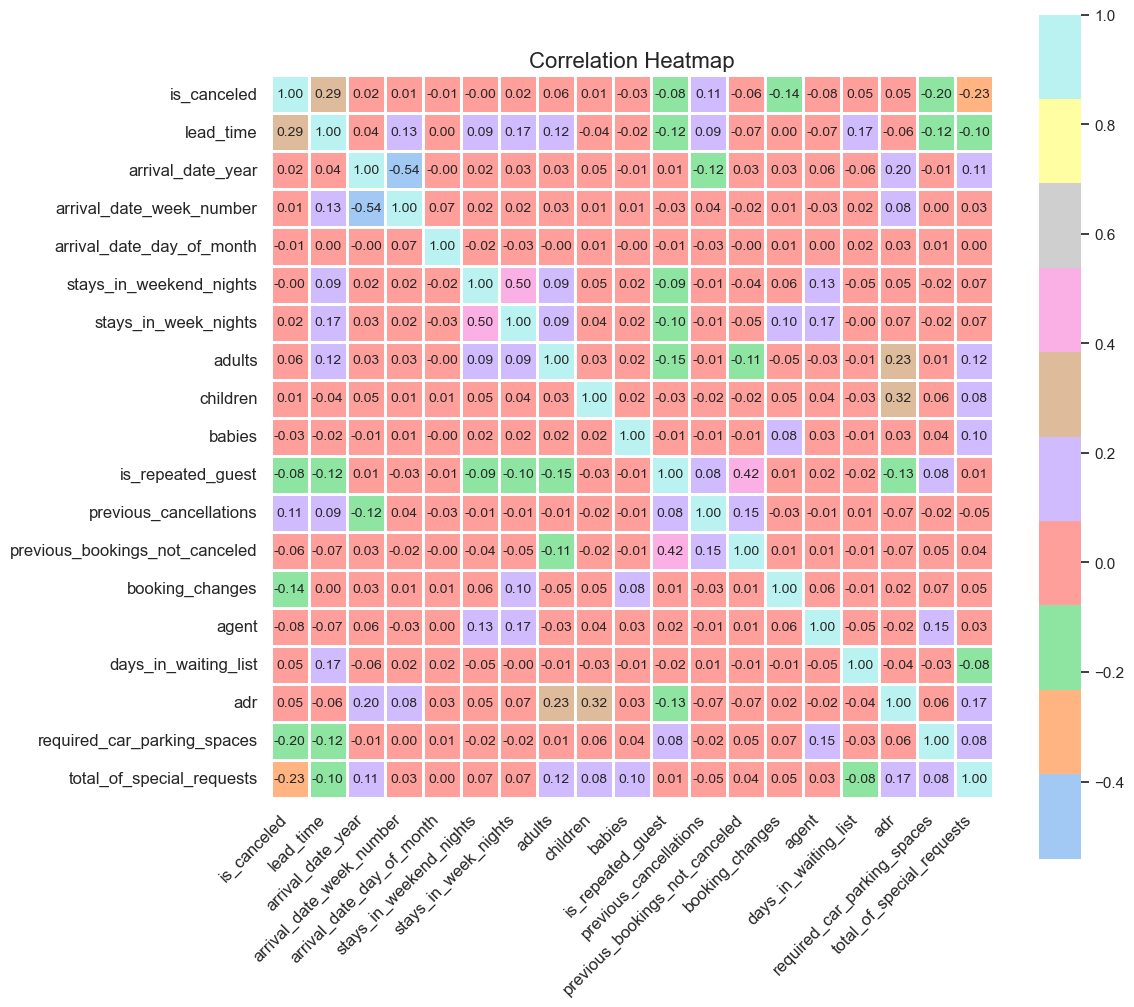

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a girly color palette
palette = sns.color_palette("pastel")

# Set the style and palette
sns.set(style='whitegrid', palette=palette)

# Create a larger figure for the heatmap
plt.figure(figsize=(12, 12))

# Generate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap with larger font size for annotations
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=palette,
                      square=True, linewidths=.8, annot_kws={"size": 10}, cbar_kws={'shrink': 0.8})

# Customize labels and title
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Removing duplicate values

In [50]:
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    # Remove duplicates
    data.drop_duplicates(inplace=True)

In [51]:
data.shape

(87130, 29)

In [52]:
object_columns = data.select_dtypes(include='object')

object_columns.nunique()

hotel                     2
arrival_date_month       12
meal                      5
country                 178
market_segment            8
distribution_channel      5
reserved_room_type       10
assigned_room_type       12
deposit_type              3
customer_type             4
dtype: int64

# Conversion of categorical columns to numeric

In [53]:
# Select the categorical columns to be one-hot encoded
categorical_columns = ["hotel","meal",'arrival_date_month','country',"market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type","customer_type"]

# Create a subset DataFrame with only the categorical columns
df_categorical = data[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' helps avoid multicollinearity

# Fit and transform the encoder on the categorical data
encoded_data = encoder.fit_transform(df_categorical)

# Manually retrieve the feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Create a DataFrame with the one-hot encoded data
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Drop the original categorical columns from the original DataFrame
data = data.drop(categorical_columns, axis=1)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
data = pd.concat([data, encoded_df], axis=1)

# Display the modified DataFrame
print(data.head())

C:\Users\Aditi\OneDrive\Documents\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0          0.0      342.0             2015.0                      27.0   
1          0.0      737.0             2015.0                      27.0   
2          0.0        7.0             2015.0                      27.0   
3          0.0       13.0             2015.0                      27.0   
4          0.0       14.0             2015.0                      27.0   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                        1.0                      0.0                   0.0   
1                        1.0                      0.0                   0.0   
2                        1.0                      0.0                   1.0   
3                        1.0                      0.0                   1.0   
4                        1.0                      0.0                   2.0   

   adults  children  babies  ...  assigned_room_type_H  assigned_room_type_I  \


In [54]:
round((data.isna().sum() * 100/ len(data)),2).sort_values(ascending=False)

is_canceled                      23.59
country_PRY                      23.59
country_NLD                      23.59
country_NOR                      23.59
country_NPL                      23.59
                                 ...  
country_ETH                      23.59
country_FIN                      23.59
country_FJI                      23.59
country_FRA                      23.59
customer_type_Transient-Party    23.59
Length: 248, dtype: float64

# Dropping rows with NaN values

In [55]:
data.dropna(inplace=True)

In [56]:
round((data.isna().sum() * 100/ len(data)),2).sort_values(ascending=False)

is_canceled                      0.0
country_PRY                      0.0
country_NLD                      0.0
country_NOR                      0.0
country_NPL                      0.0
                                ... 
country_ETH                      0.0
country_FIN                      0.0
country_FJI                      0.0
country_FRA                      0.0
customer_type_Transient-Party    0.0
Length: 248, dtype: float64

In [57]:
data.shape

(60226, 248)

In [68]:
labels = data.is_canceled.unique()

# III.TRAIN AND TEST SPLIT

In [76]:
scaler = StandardScaler()

X = data.drop(columns=['is_canceled'])
y = data['is_canceled']

# Fit the scaler on the training data and transform it
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# IV. MODEL IMPLEMENTATION

# Logistic Regression

Total time: 1.69s
Accuracy -  0.7958658475842604
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      7302
         1.0       0.77      0.68      0.73      4744

    accuracy                           0.80     12046
   macro avg       0.79      0.78      0.78     12046
weighted avg       0.79      0.80      0.79     12046



<Axes: >

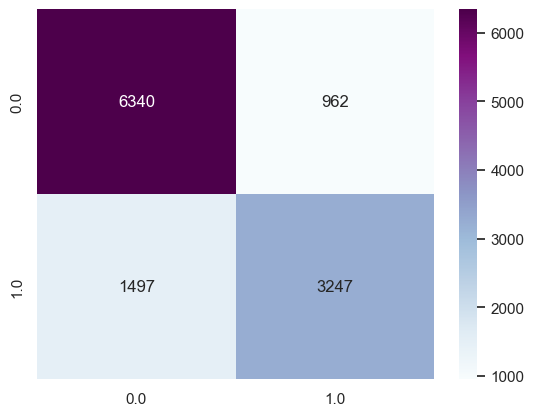

In [73]:
logistic_model = LogisticRegression(max_iter=1000)

st_time = time.time()


# Fit the model on the scaled training data
logistic_model.fit(X_train, y_train)

# Make predictions on the scaled test set
y_pred = logistic_model.predict(X_test)
en_time = time.time()
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Total time: {:.2f}s'.format(en_time-st_time))
print('Accuracy - ', accuracy)
print(classification_rep)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=labels, yticklabels=labels)

In [60]:
import pandas as pd

# Assuming 'logistic_model' is your logistic regression model
coefficients = logistic_model.coef_[0]

# Assuming 'X' is your feature matrix
feature_names = X.columns

# Create a DataFrame to display the feature names and corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the DataFrame
print(coefficients_df)

                           Feature  Coefficient
0                        lead_time     0.387084
1                arrival_date_year     0.838853
2         arrival_date_week_number     0.404201
3        arrival_date_day_of_month    -0.002637
4          stays_in_weekend_nights    -0.040936
..                             ...          ...
242        deposit_type_Non Refund     0.002130
243        deposit_type_Refundable     0.039118
244            customer_type_Group     0.015927
245        customer_type_Transient     0.120224
246  customer_type_Transient-Party    -0.039674

[247 rows x 2 columns]


In [21]:
feature_names.shape

(247,)

In [22]:
coefficients.shape

(247,)

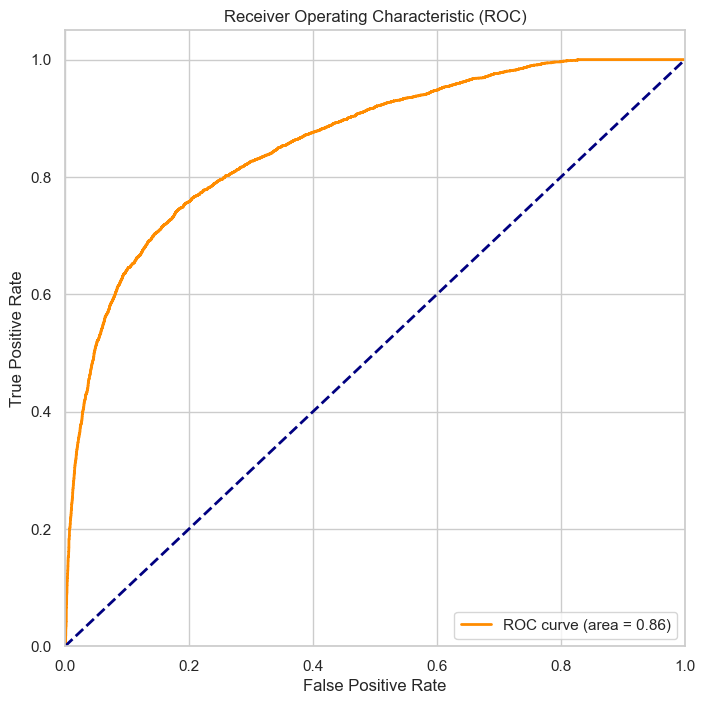

In [23]:
# Calculate the ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

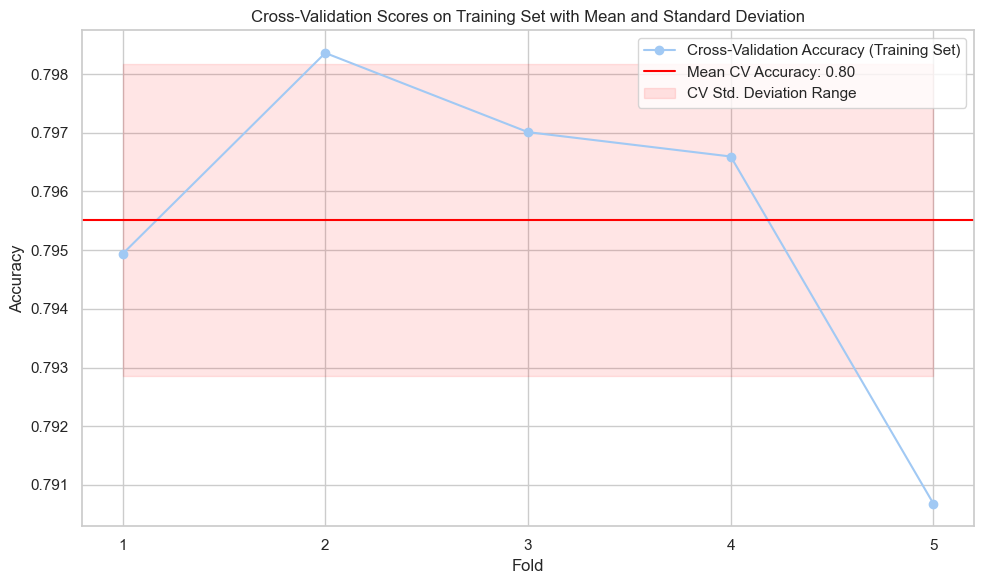

In [28]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training set using the selected variables
cv_scores_train = cross_val_score(logistic_model, X_train, y_train, cv=5)

# Fit the classifier to the training set for the selected variables
logistic_model.fit(X_train, y_train)

# Get test accuracy by making predictions on the test set for the selected variables
y_pred = logistic_model.predict(X_test)
test_accuracy_top_20 = accuracy_score(y_test, y_pred)

# Calculate mean and standard deviation for the cross-validation scores on the training set
cv_mean_top_20 = cv_scores_train.mean()
cv_std_top_20 = cv_scores_train.std()

# Plotting
# Correcting the plot to accurately reflect the standard deviation range around the mean CV accuracy line
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores_train, label='Cross-Validation Accuracy (Training Set)', marker='o')
plt.axhline(y=cv_mean_top_20, color='r', linestyle='-', label=f'Mean CV Accuracy: {cv_mean_top_20:.2f}')
plt.fill_between(range(1, 6), [cv_mean_top_20 - cv_std_top_20]*5, [cv_mean_top_20 + cv_std_top_20]*5, alpha=0.1, color="r", label='CV Std. Deviation Range')
plt.title('Cross-Validation Scores on Training Set with Mean and Standard Deviation')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

# KNN

In [24]:
accuracy = []

# Calculating MAE error for K values between 1 and 39
for k in range(1, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Use y_train instead of y
    pred_i = knn.predict(X_test)
    acc = accuracy_score(y_test, pred_i)  # Use y_test instead of y
    accuracy.append(acc)
# Create a DataFrame to display k values and accuracy values
accuracy_df = pd.DataFrame({'K Value': range(1,21, 2), 'Accuracy': accuracy})

# Display the DataFrame
accuracy_df

,K Value,Accuracy
0,1,0.760833
1,3,0.766395
2,5,0.769965
3,7,0.767060
4,9,0.766645
5,11,0.765814
6,13,0.766395
7,15,0.766562
8,17,0.764901
9,19,0.764735


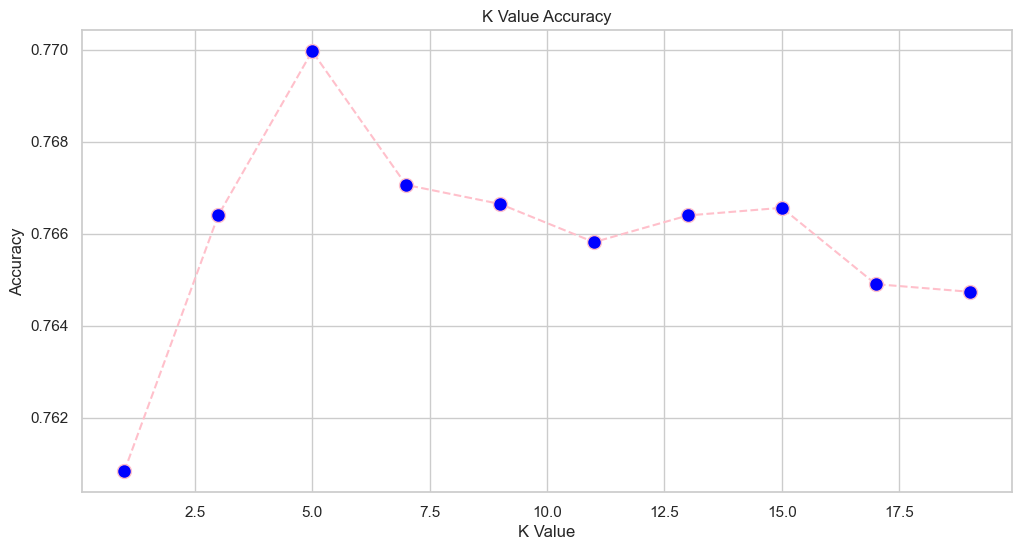

In [25]:
plt.figure(figsize=(12, 6))   

plt.plot(range(1, 21,2), accuracy, color='pink', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
         
plt.title('K Value Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy');   

Total time: 35.36s


,Threshold,TN,TP,FN,FP,Precision,Recall,F1,Accuracy
0,0.1,2543,4562,182,4759,0.489432,0.961636,0.648702,0.589822
1,0.2,4540,4051,693,2762,0.594599,0.853921,0.701047,0.713183
2,0.3,4540,4051,693,2762,0.594599,0.853921,0.701047,0.713183
3,0.4,6060,3215,1529,1242,0.721337,0.677698,0.698837,0.769965
4,0.5,6060,3215,1529,1242,0.721337,0.677698,0.698837,0.769965
5,0.6,6824,2237,2507,478,0.823941,0.471543,0.599812,0.752200
6,0.7,6824,2237,2507,478,0.823941,0.471543,0.599812,0.752200
7,0.8,7194,1218,3526,108,0.918552,0.256745,0.401318,0.698323
8,0.9,7194,1218,3526,108,0.918552,0.256745,0.401318,0.698323


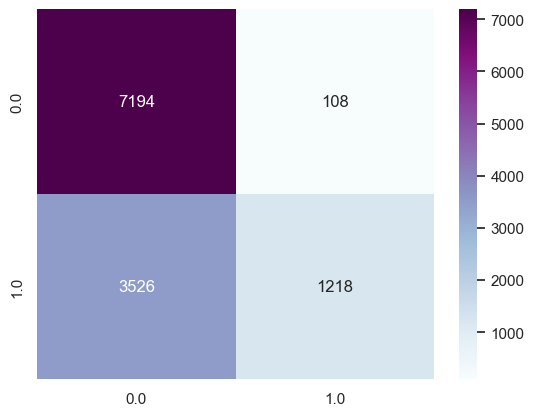

In [72]:
# Initialize a list of probability thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize lists to store performance metrics
threshold_metrics = []

st_time = time.time()


for threshold in thresholds:
    # Calculate predicted probabilities using the best k value (e.g., k=1)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    probabilities = knn.predict_proba(X_test)[:, 1]
    en_time = time.time() 
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (probabilities > threshold).astype(int)
    
    # Calculate performance metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the metrics for this threshold
    threshold_metrics.append([threshold, tn, tp, fn, fp, precision, recall, f1, accuracy])

# Create a DataFrame to store performance metrics for each threshold
columns = ['Threshold', 'TN', 'TP', 'FN', 'FP', 'Precision', 'Recall', 'F1', 'Accuracy']
performance_df = pd.DataFrame(threshold_metrics, columns=columns)

print('Total time: {:.2f}s'.format(en_time-st_time))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=labels, yticklabels=labels)

# Display the performance metrics
performance_df

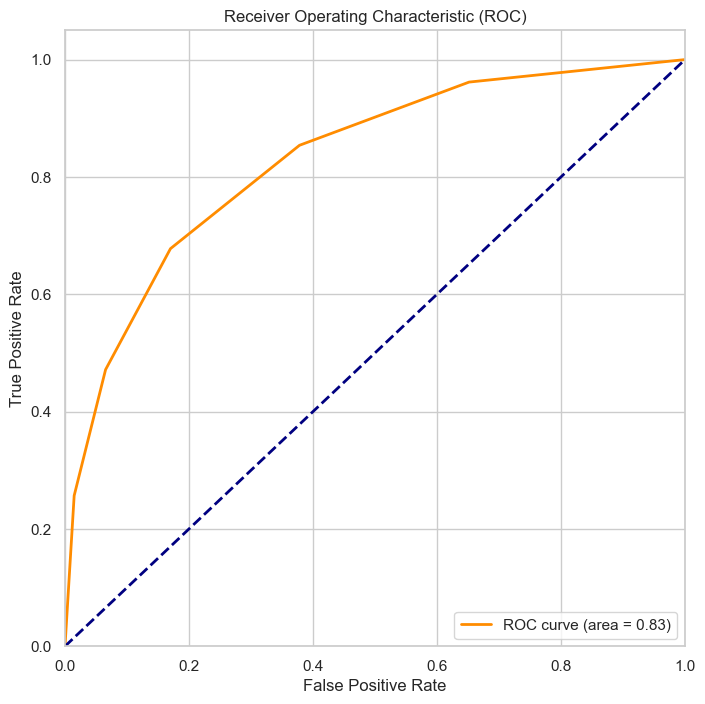

In [27]:
# Calculate the ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

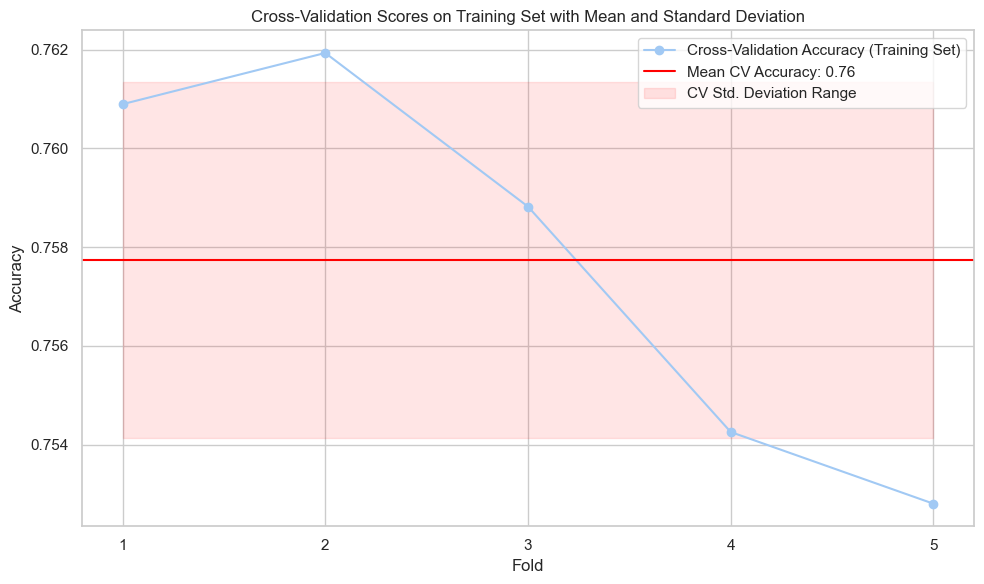

In [28]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training set using the selected variables
cv_scores_train = cross_val_score(knn, X_train, y_train, cv=5)

# Fit the classifier to the training set for the selected variables
logistic_model.fit(X_train, y_train)

# Get test accuracy by making predictions on the test set for the selected variables
y_pred = knn.predict(X_test)
test_accuracy_top_20 = accuracy_score(y_test, y_pred)

# Calculate mean and standard deviation for the cross-validation scores on the training set
cv_mean_top_20 = cv_scores_train.mean()
cv_std_top_20 = cv_scores_train.std()

# Plotting
# Correcting the plot to accurately reflect the standard deviation range around the mean CV accuracy line
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores_train, label='Cross-Validation Accuracy (Training Set)', marker='o')
plt.axhline(y=cv_mean_top_20, color='r', linestyle='-', label=f'Mean CV Accuracy: {cv_mean_top_20:.2f}')
plt.fill_between(range(1, 6), [cv_mean_top_20 - cv_std_top_20]*5, [cv_mean_top_20 + cv_std_top_20]*5, alpha=0.1, color="r", label='CV Std. Deviation Range')
plt.title('Cross-Validation Scores on Training Set with Mean and Standard Deviation')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

# Random Forest Classifier

C:\Users\Aditi\OneDrive\Documents\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
54 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Aditi\OneDrive\Documents\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Aditi\OneDrive\Documents\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Aditi\OneDrive\Documents\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Use

Best model parameters:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 17, 'n_estimators': 160}
Best accuracy on the training set:  0.9123495226234953
Accuracy on the test set:  0.9169848912502075
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      7302
         1.0       0.95      0.83      0.89      4744

    accuracy                           0.92     12046
   macro avg       0.92      0.90      0.91     12046
weighted avg       0.92      0.92      0.92     12046

Total time: 347.67s


<Axes: >

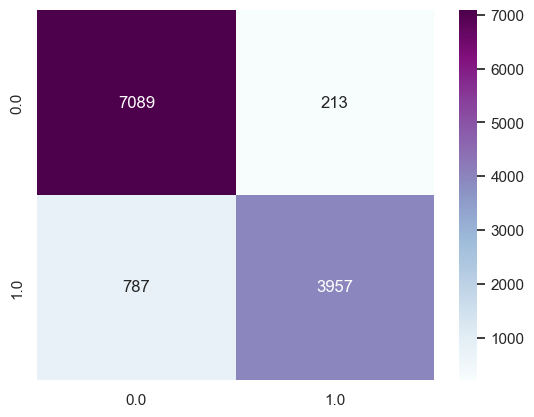

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Initialize Random Forest model
random_forest_model = RandomForestClassifier()

# Define the hyperparameter grid for Random Forest
param_distribution = {
    'n_estimators': randint(10, 200),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(random_forest_model, param_distributions=param_distribution, n_iter=50,
                                   scoring='accuracy', cv=3, n_jobs=-1, random_state=42)
st_time = time.time()
# Fit the RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

# After fitting, the best model can be accessed with random_search.best_estimator_
best_model = random_search.best_estimator_

# Get the best accuracy on the training set
best_accuracy_train = random_search.best_score_

# Make predictions on the test set
y_pred = best_model.predict(X_test)
en_time = time.time() 
# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Best model parameters: ", random_search.best_params_)
print("Best accuracy on the training set: ", best_accuracy_train)
print("Accuracy on the test set: ", accuracy_test)
print("Classification Report:\n", classification_rep)

print('Total time: {:.2f}s'.format(en_time-st_time))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=labels, yticklabels=labels)

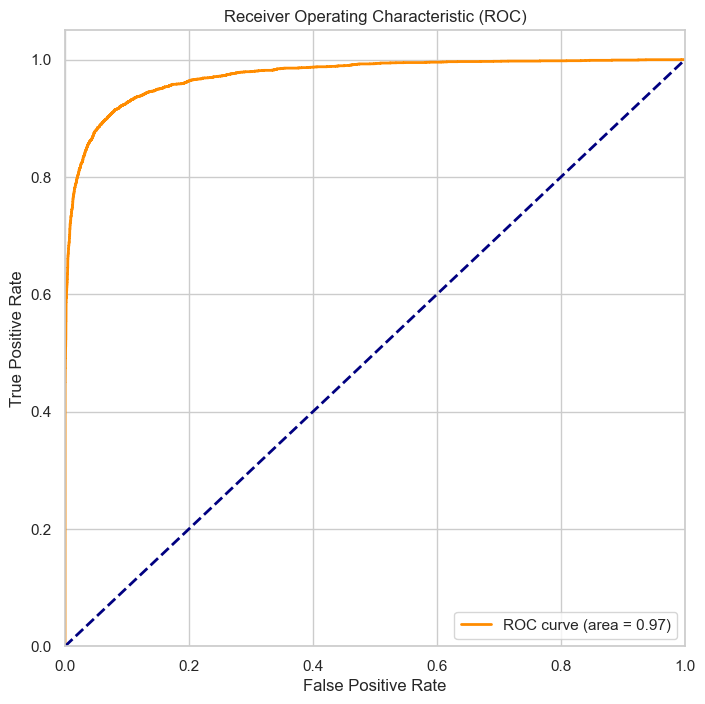

In [32]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC for the best model
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


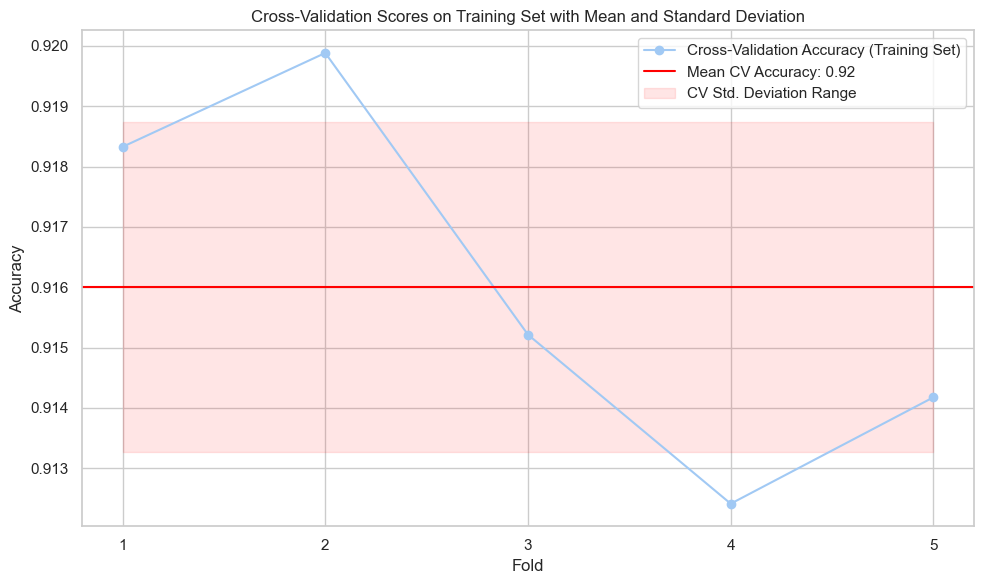

In [34]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training set using the Random Forest model
cv_scores_train = cross_val_score(random_forest_model, X_train, y_train, cv=5)

# Fit the Random Forest model to the training set
random_forest_model.fit(X_train, y_train)

# Get test accuracy by making predictions on the test set using the Random Forest model
y_pred = random_forest_model.predict(X_test)
test_accuracy_top_20 = accuracy_score(y_test, y_pred)

# Calculate mean and standard deviation for the cross-validation scores on the training set
cv_mean_top_20 = cv_scores_train.mean()
cv_std_top_20 = cv_scores_train.std()

# Plotting
# Correcting the plot to accurately reflect the standard deviation range around the mean CV accuracy line
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores_train, label='Cross-Validation Accuracy (Training Set)', marker='o')
plt.axhline(y=cv_mean_top_20, color='r', linestyle='-', label=f'Mean CV Accuracy: {cv_mean_top_20:.2f}')
plt.fill_between(range(1, 6), [cv_mean_top_20 - cv_std_top_20]*5, [cv_mean_top_20 + cv_std_top_20]*5, alpha=0.1, color="r", label='CV Std. Deviation Range')
plt.title('Cross-Validation Scores on Training Set with Mean and Standard Deviation')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

# XGBOOST

In [35]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Custom scorers
scorers = {
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1),
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score)
}

# XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200], # Number of boosting rounds, default=100
    'max_depth': [3, 5, 7], # default=6
    'learning_rate': [0.01, 0.1, 0.2] # default=0.3
}

# Grid Search with multiple scorers
grid_search = GridSearchCV(estimator=xgb_classifier,
                           param_grid=param_grid,
                           scoring=scorers,
                           refit='f1',  # Can change to any key in scorers dictionary
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

# Fitting the model
grid_search.fit(X_train, y_train)

# Accessing the results
grid_search_results = pd.DataFrame(grid_search.cv_results_)
grid_search_results

Fitting 5 folds for each of 27 candidates, totalling 135 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_precision,split1_test_precision,...,std_test_accuracy,rank_test_accuracy,split0_test_auc,split1_test_auc,split2_test_auc,split3_test_auc,split4_test_auc,mean_test_auc,std_test_auc,rank_test_auc
0,3.892340,0.184040,0.088902,0.015313,0.01,3,50,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.933263,0.940895,...,0.002004,27,0.723121,0.723305,0.728391,0.726461,0.721472,0.724550,0.002509,27
1,5.487017,0.382141,0.091103,0.019096,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.934694,0.915668,...,0.002707,26,0.730413,0.736713,0.736236,0.728274,0.732821,0.732891,0.003264,26
2,9.753441,0.309360,0.109478,0.017119,0.01,3,200,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.902277,0.879819,...,0.005703,24,0.766886,0.779498,0.789641,0.777827,0.784273,0.779625,0.007582,24
3,4.196111,0.277487,0.097391,0.022919,0.01,5,50,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.962612,0.954289,...,0.004817,25,0.747994,0.737177,0.742967,0.733447,0.749335,0.742184,0.006114,25
4,8.091492,0.513694,0.128433,0.011205,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.961658,0.953408,...,0.002734,23,0.776828,0.781928,0.786696,0.781380,0.779654,0.781297,0.003232,23
5,14.655330,0.424813,0.208852,0.108612,0.01,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.940743,0.927051,...,0.003229,20,0.822977,0.832043,0.831917,0.827249,0.821634,0.827164,0.004348,21
6,6.084836,0.341558,0.149923,0.052696,0.01,7,50,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.957363,0.936556,...,0.003740,22,0.810254,0.812365,0.806229,0.810364,0.797531,0.807348,0.005298,22
7,12.080586,3.790820,0.957649,0.879198,0.01,7,100,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.941238,0.925703,...,0.002072,19,0.840164,0.845423,0.844486,0.837640,0.840464,0.841635,0.002897,19
8,14.444374,2.388402,0.251333,0.306936,0.01,7,200,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.946765,0.932039,...,0.002286,16,0.856699,0.861470,0.864105,0.856203,0.860430,0.859781,0.002976,17
9,2.821826,1.496934,0.127829,0.139980,0.1,3,50,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.894513,0.872642,...,0.003430,21,0.833220,0.830944,0.837272,0.829030,0.830035,0.832100,0.002933,20


In [36]:
grid_search_results.sort_values(by='rank_test_f1')[['mean_test_f1','std_test_f1','params']][:10]

,mean_test_f1,std_test_f1,params
26,0.925964,0.004172,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti..."
23,0.919389,0.003861,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."
25,0.919136,0.005642,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti..."
17,0.917854,0.005349,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti..."
22,0.902171,0.007094,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."
14,0.899749,0.007790,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
16,0.898912,0.004985,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti..."
24,0.898503,0.003379,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti..."
20,0.887897,0.005040,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti..."
21,0.875355,0.004536,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."


Accuracy on the test set:  0.9501079196413748
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      7302
         1.0       0.95      0.92      0.94      4744

    accuracy                           0.95     12046
   macro avg       0.95      0.95      0.95     12046
weighted avg       0.95      0.95      0.95     12046

Total time: 11.19s


<Axes: >

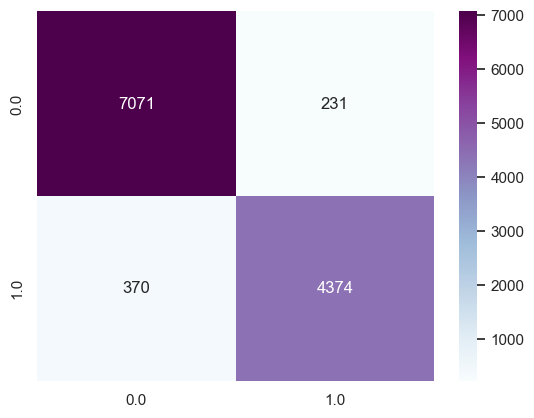

In [74]:
# Initialize XGBoost model with the provided parameters
xgb_model = XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=1000, objective='binary:logistic', random_state=42)
st_time = time.time()
# Fit the XGBoost model to the training set
xgb_model.fit(X_train, y_train)

# Get test accuracy by making predictions on the test set using XGBoost
y_pred = xgb_model.predict(X_test)
en_time = time.time() 
test_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy on the test set: ", test_accuracy)
print("Classification Report:\n", classification_rep)

print('Total time: {:.2f}s'.format(en_time-st_time))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=labels, yticklabels=labels)

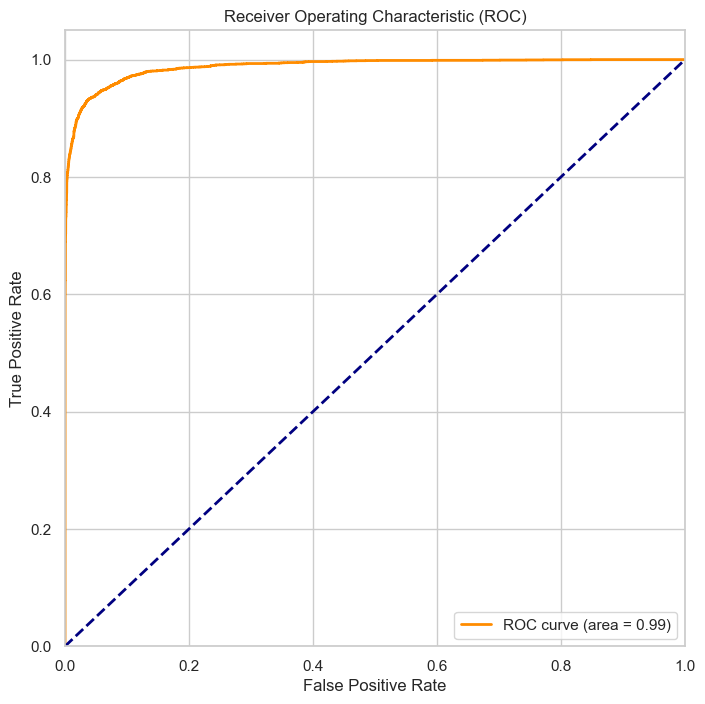

In [38]:
# Calculate the ROC curve and AUC for the best model
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

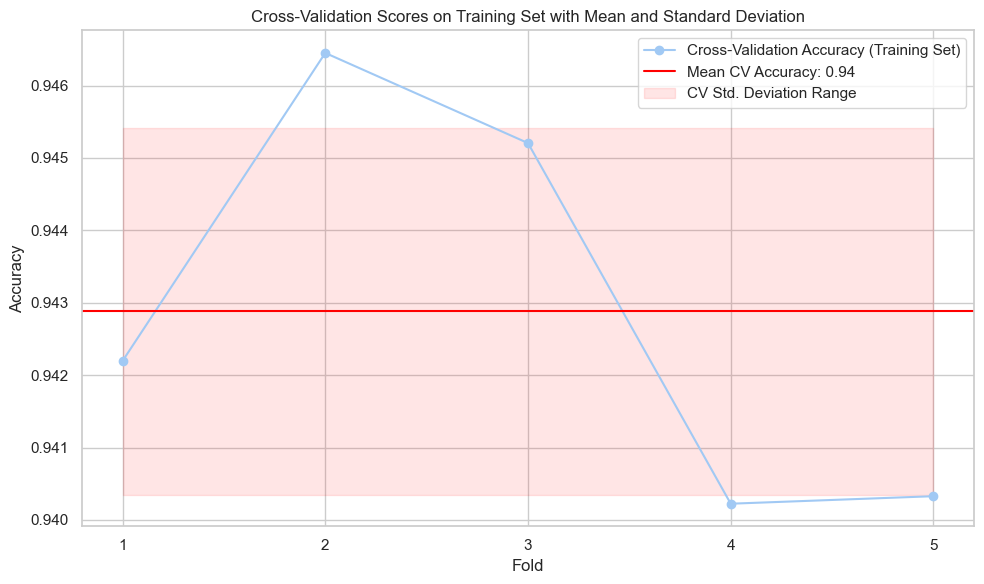

In [39]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training set using the Random Forest model
cv_scores_train = cross_val_score(xgb_model, X_train, y_train, cv=5)

# Fit the Random Forest model to the training set
xgb_model.fit(X_train, y_train)

# Get test accuracy by making predictions on the test set using the Random Forest model
y_pred = random_forest_model.predict(X_test)
test_accuracy_top_20 = accuracy_score(y_test, y_pred)

# Calculate mean and standard deviation for the cross-validation scores on the training set
cv_mean_top_20 = cv_scores_train.mean()
cv_std_top_20 = cv_scores_train.std()

# Plotting
# Correcting the plot to accurately reflect the standard deviation range around the mean CV accuracy line
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores_train, label='Cross-Validation Accuracy (Training Set)', marker='o')
plt.axhline(y=cv_mean_top_20, color='r', linestyle='-', label=f'Mean CV Accuracy: {cv_mean_top_20:.2f}')
plt.fill_between(range(1, 6), [cv_mean_top_20 - cv_std_top_20]*5, [cv_mean_top_20 + cv_std_top_20]*5, alpha=0.1, color="r", label='CV Std. Deviation Range')
plt.title('Cross-Validation Scores on Training Set with Mean and Standard Deviation')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

# V. SUMMARY

# Comparison of all models

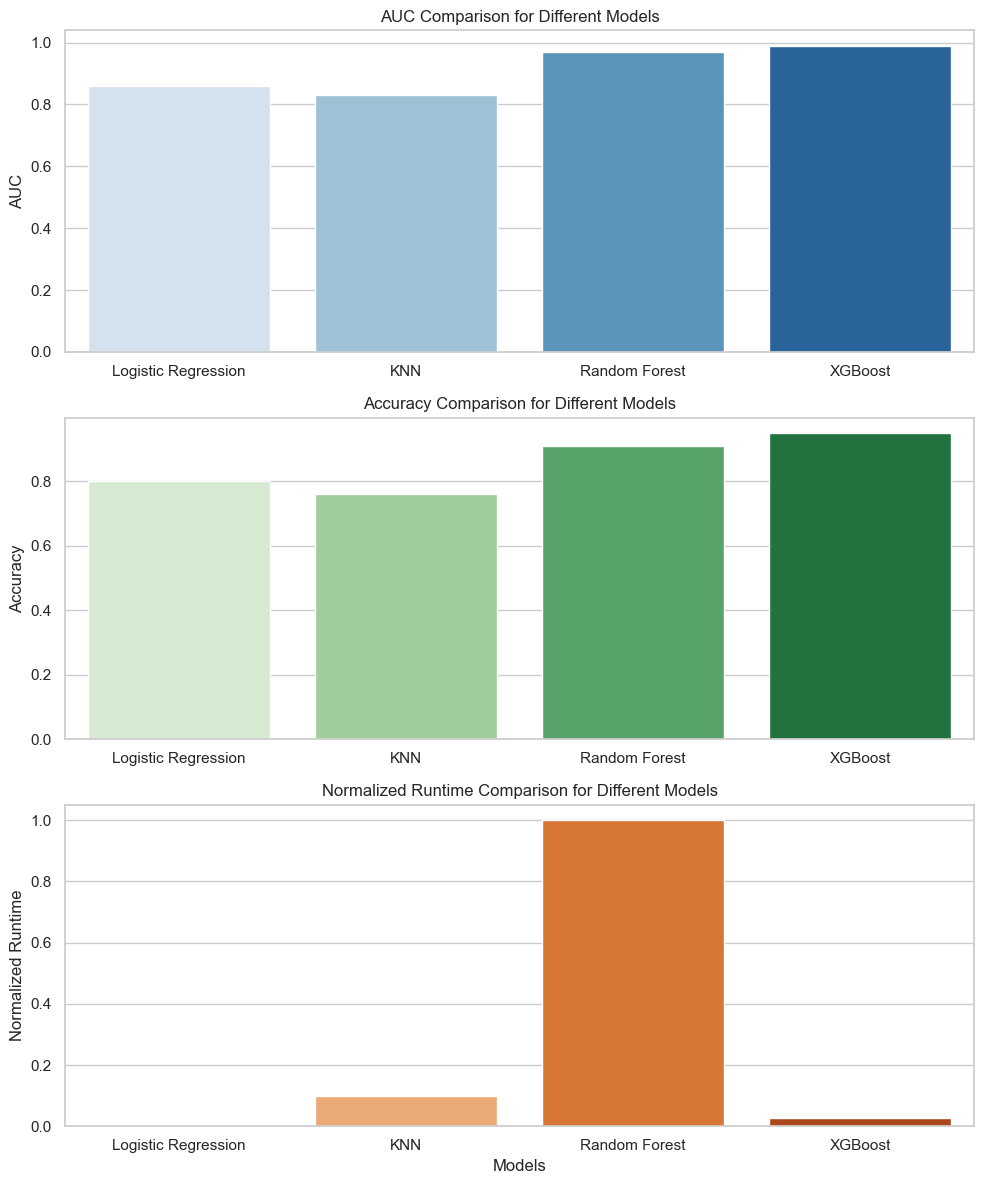

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost']

# AUC, Accuracy, and Runtime values for each model
auc_values = [0.86, 0.83, 0.97, 0.99]
accuracy_values = [0.80, 0.76, 0.91, 0.95]
runtime_values = [1.69, 35.36, 347, 11]

# Normalize runtime values for better visualization
normalized_runtime = [(val - min(runtime_values)) / (max(runtime_values) - min(runtime_values)) for val in runtime_values]

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot AUC values
sns.barplot(x=models, y=auc_values, palette='Blues', ax=ax1)
ax1.set_title('AUC Comparison for Different Models')
ax1.set_ylabel('AUC')

# Plot Accuracy values
sns.barplot(x=models, y=accuracy_values, palette='Greens', ax=ax2)
ax2.set_title('Accuracy Comparison for Different Models')
ax2.set_ylabel('Accuracy')

# Plot Normalized Runtime values
sns.barplot(x=models, y=normalized_runtime, palette='Oranges', ax=ax3)
ax3.set_title('Normalized Runtime Comparison for Different Models')
ax3.set_ylabel('Normalized Runtime')

# Add labels and display the plot
plt.xlabel('Models')
plt.tight_layout()
plt.show()


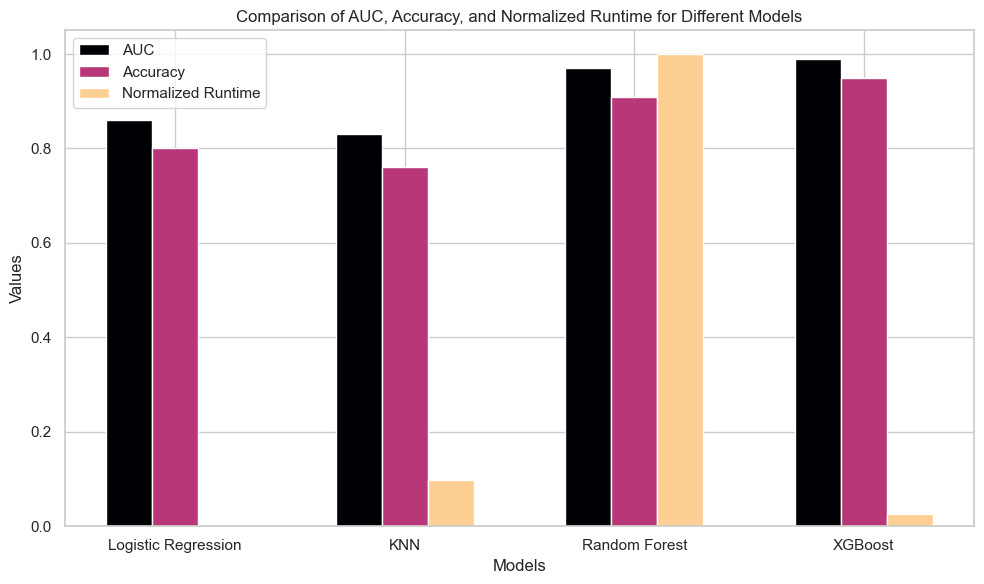

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost']

# AUC, Accuracy, and Runtime values for each model
auc_values = [0.86, 0.83, 0.97, 0.99]
accuracy_values = [0.80, 0.76, 0.91, 0.95]
runtime_values = [1.69, 35.36, 347, 11]

# Normalize runtime values for better visualization
normalized_runtime = [(val - min(runtime_values)) / (max(runtime_values) - min(runtime_values)) for val in runtime_values]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Bar positions
bar_positions_auc = np.arange(len(models))
bar_positions_accuracy = bar_positions_auc + bar_width
bar_positions_runtime = bar_positions_accuracy + bar_width

# Plotting the stacked bars
ax.bar(bar_positions_auc, auc_values, width=bar_width, label='AUC', color=plt.cm.magma(0))
ax.bar(bar_positions_accuracy, accuracy_values, width=bar_width, label='Accuracy', color=plt.cm.magma(0.5))
ax.bar(bar_positions_runtime, normalized_runtime, width=bar_width, label='Normalized Runtime', color=plt.cm.magma(0.9))

# Add labels and legend
ax.set_xticks(bar_positions_accuracy)
ax.set_xticklabels(models)
ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Comparison of AUC, Accuracy, and Normalized Runtime for Different Models')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Final Selection:

The <b>XGBoost model</b> stands out as the top performer in both AUC and accuracy while maintaining a relatively low runtime of 11 seconds.

# Recommendations for the Employer:

Deploy XGBoost Model: Implement the XGBoost model for predicting hotel reservation cancellations due to its superior performance and reasonable runtime. <b>It also reduces type I errors as it is important in this case.</b>

Data Quality: Ensure data quality and consistency, addressing any missing or erroneous values to enhance model accuracy.  

Real-time Integration: Explore real-time integration of the model into the reservation system for timely decision-making.  

Regular Model Updates: Periodically update the model with new data to adapt to evolving patterns and maintain prediction accuracy.  


# Concerns about Data or Model:

1) The data is imbalanced. The rate of canceled is more than the rate of not canceled. This can cause problems with the precision and recall values.  

2. The dataset had a lot of null and NaN values. This data could have been useful if it were not for this.

# Overall Assessment:

The XGBoost model emerges as the preferred choice, offering a balanced combination of high predictive performance and efficient runtime. Regular monitoring and updates to the model, along with attention to data quality, are essential for sustained success in predicting hotel reservation cancellations.